In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [157]:
include("./Distributions.jl")
using .MakeDistributions

include("./Plots.jl")
using .Plots

In [7]:
using DataFrames, DataFramesMeta, GLM
using Statistics, StatsBase
using CodecZlib, MatrixMarket
using CSV

[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b] (cache misses: wrong dep version loaded (6))


In [9]:
df = CSV.read("./Data/10331_raw_counts.csv", DataFrame; delim = ',');

In [22]:
A = Matrix(df[:, 2:end])'
M = A ./ sum(A, dims=1);

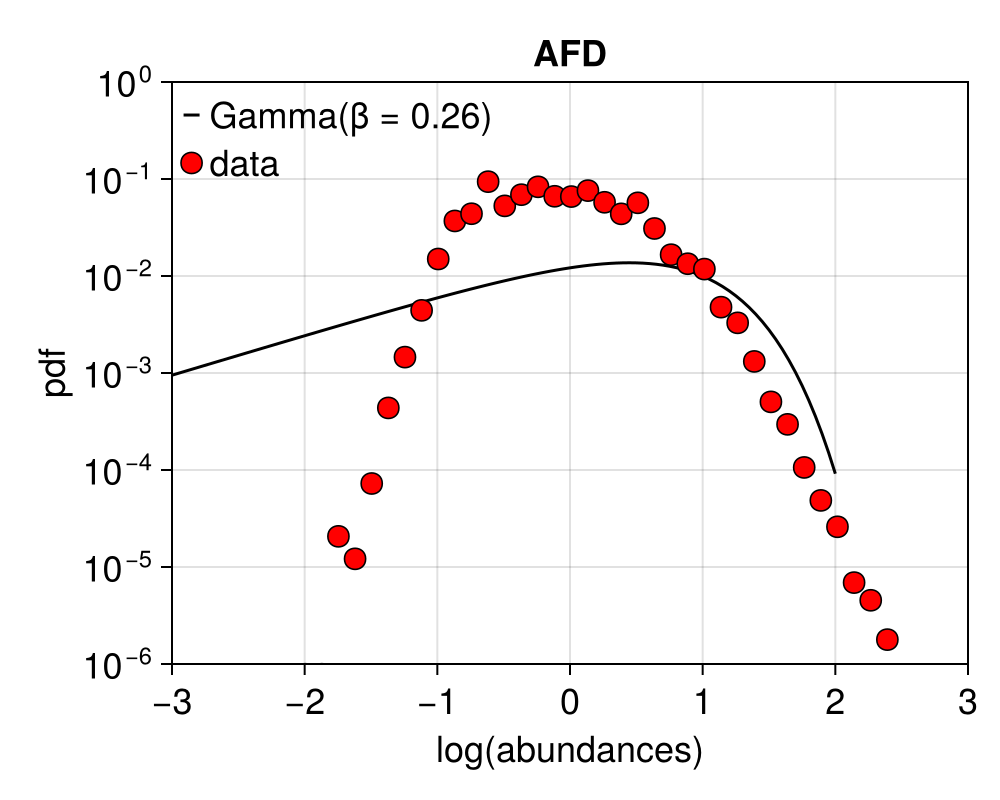

CairoMakie.Screen{IMAGE}


In [159]:
# Compute distributions
afd = MakeDistributions.make_AFD(M; Δb=0.2, env="AFD")
# mad = MakeDistributions.make_MAD(M; Δb=0.5, env="MAD", c=exp(-20))

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="data", savepath=nothing)
display(fig)

# fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="data", savepath=nothing)
# display(fig)